<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/ode/Class_3_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 451, Spring 2021**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# IVP Final Topics
* Coupled Systems
* Stiff Problems

Reference:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html 


# Warm up Example
2nd (or higher) order problems are solved by "unrolling" into a N first-order equations

Solve the problem:  $y'' +4y = 4t$ with $y(0)=0$ and $y'(0)=0$ from $t=0$ to $2$.

Define $y_0 = y(t),  y_1 = y'(t)$.  

The solver successfully reached the end of the integration interval.


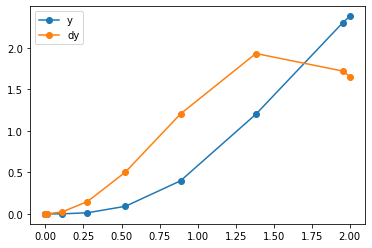

In [30]:
def f(t,y):
  y0 = y[0]
  y1 = y[1]
  return [y1, 4*t - 4*y0] 

tf = 2
yp0 = 0
y0 = 0
sol = solve_ivp(f, [0,tf],[y0, yp0]   )
print(sol.message)  # ALWAYS CHECK!
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.plot(t,y,'o-', label='y')
plt.plot(t,yp,'o-', label='dy')
plt.legend()
plt.show()

In [33]:
print(' y at Tmax =\t',y[-1])
print('dy at Tmax =\t',yp[-1])

 y at Tmax =	 2.37885242482828
dy at Tmax =	 1.6528131739448797


1.6528131739448797

In [ ]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 2.76426142e-01, 5.25602650e-01, 8.88191282e-01,
       1.38298881e+00, 1.95447361e+00, 2.00000000e+00])
 t_events: None
        y: array([[0.00000000e+00, 6.66666665e-13, 8.87333119e-10, 9.11731533e-07,
        9.11965118e-04, 1.38677718e-02, 9.15920852e-02, 3.98735787e-01,
        1.19974960e+00, 2.30207748e+00, 2.37885242e+00],
       [0.00000000e+00, 1.99999999e-08, 2.41999902e-06, 2.46409880e-04,
        2.45850350e-02, 1.48970190e-01, 5.03479657e-01, 1.20418295e+00,
        1.93039988e+00, 1.71900478e+00, 1.65281317e+00]])
 y_events: None

# Coupled Systems 

## Predator-Prey Example


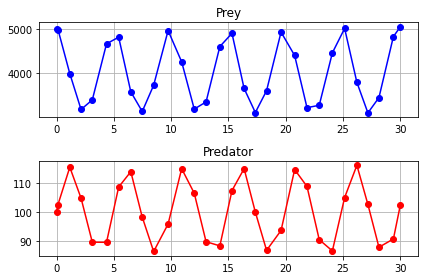

In [37]:
def f(t,y):
  a0 = 2
  d0 = 0.02
  a1 = 0.0002
  d1 = 0.8
  y0 = y[0]
  y1 = y[1]
  return [a0*y0 - d0*y0*y1, a1*y0*y1 - d1*y1] 

tf = 30
prey0 = 5000
pred0 = 100
sol = solve_ivp(f, [0,tf],[prey0, pred0]   )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()

Sometimes RK45 is **too** efficient and you wish you havd more points to make smoother plots.  You can do this by declaring your own t array and using *t_eval*

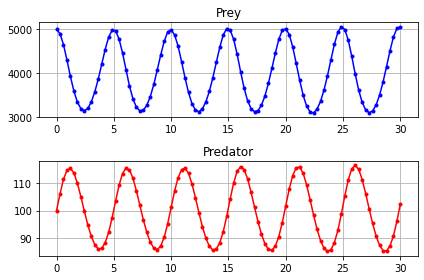

In [39]:
t = np.linspace(0,30,100)
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
#t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'b.-', label='y')
plt.title('Prey')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t,yp,'r.-', label='dy')
plt.title('Predator')
plt.grid()

plt.tight_layout()
plt.show()

# Stiff Problems

When a variable changes very rapidly, the adaptive step size of RK45 can have problems.  

Remember that *solve_ivp* has multiple methods.  Start with the default RK45 method (or DOP853 for high precision), and if it fails try BDF.  



## Examples 7.7 and 7.9 - "Moderately Stiff"
Notice how RK45 uses too many steps on the smooth portion



Method:  RK45
The solver successfully reached the end of the integration interval.
nfev =  242
num points =  39

Method:  BDF
The solver successfully reached the end of the integration interval.
nfev =  109
num points =  53

Method:  Radau
The solver successfully reached the end of the integration interval.
nfev =  148
num points =  21


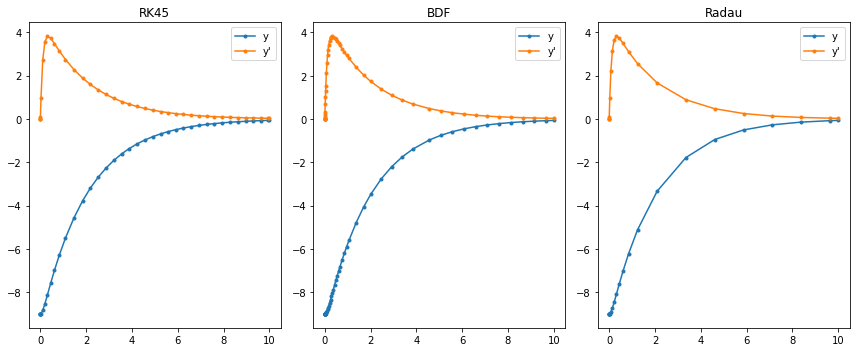

In [41]:
def f(t,y): 
  return [y[1], -4.75*y[0] - 10.0*y[1]]

y0 = [-9,0]
TMAX = 10

METHODS = ['RK45','BDF','Radau']
plt.figure(figsize=(12,5))
for i in range(len(METHODS)):
  plt.subplot(1,3,i+1)
  m = METHODS[i]
  ivp = solve_ivp(f, [0,TMAX],y0,method=m)
  t = ivp.t
  y = ivp.y[0]
  yp = ivp.y[1]

  print('\nMethod: ',m)
  print(ivp.message)
  print('nfev = ',ivp.nfev)
  print('num points = ',len(t))

  plt.plot(t, y,'.-',label='y')
  plt.plot(t, yp, '.-',label='y\'')
  plt.legend()
  plt.title(m)


plt.tight_layout()
plt.show()

## Problem 7.2.9
An even stiffer problem where RK45 struggles more.


Method:  RK45
The solver successfully reached the end of the integration interval.
nfev =  428
num points =  69

Method:  BDF
The solver successfully reached the end of the integration interval.
nfev =  74
num points =  37

Method:  Radau
The solver successfully reached the end of the integration interval.
nfev =  107
num points =  16


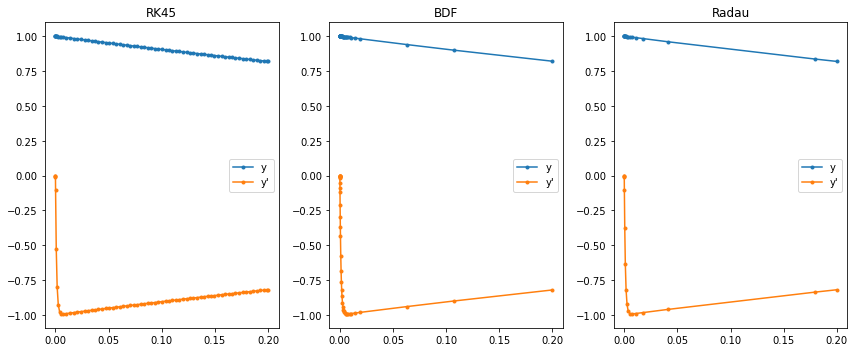

In [42]:
def f(t,y): 
  return [y[1], -1001*y[1] - 1000*y[0]]

y0 = [1,0]
TMAX = 0.2

METHODS = ['RK45','BDF','Radau']
plt.figure(figsize=(12,5))
for i in range(len(METHODS)):
  plt.subplot(1,3,i+1)
  m = METHODS[i]
  ivp = solve_ivp(f, [0,TMAX],y0,method=m)
  t = ivp.t
  y = ivp.y[0]
  yp = ivp.y[1]

  print('\nMethod: ',m)
  print(ivp.message)
  print('nfev = ',ivp.nfev)
  print('num points = ',len(t))

  plt.plot(t, y,'.-',label='y')
  plt.plot(t, yp, '.-',label='y\'')
  plt.legend()
  plt.title(m)

plt.tight_layout()
plt.show()